In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

sns.set_style('darkgrid')
%matplotlib inline

## Load Data

In [2]:
training_set = pd.read_csv('Train_Titanic.csv')

In [3]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Cleaning the Data

In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Make data Summary
list_item = []

for col in training_set.columns:
    list_item.append([col, training_set[col].dtype, training_set[col].isna().sum(), 
                     round(training_set[col].isna().sum()/len(training_set[col])*100,2), training_set[col].nunique(),
                    list(training_set[col].sample(5).drop_duplicates().values)])
    
dfSummary = pd.DataFrame(list_item, columns=['feature', 'dtype', 'null', 'nulPct', 'unique', 'sample'])
dfSummary

,feature,dtype,null,nulPct,unique,sample
0,PassengerId,int64,0,0.00,891,"[71, 146, 529, 681, 495]"
1,Survived,int64,0,0.00,2,"[1, 0]"
2,Pclass,int64,0,0.00,3,"[1, 3]"
3,Name,object,0,0.00,891,"[Davies, Mr. Alfred J, Moen, Mr. Sigurd Hansen..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[11.0, 34.0, nan, 59.0, 39.0]"
6,SibSp,int64,0,0.00,7,"[3, 0]"
7,Parch,int64,0,0.00,7,"[0, 1]"
8,Ticket,object,0,0.00,681,"[CA. 2343, 367226, 27267, 250653, F.C.C. 13529]"
9,Fare,float64,0,0.00,248,"[69.55, 7.225, 24.15, 13.0, 6.8583]"


* Age = 19.87 % Null /NaN values
* Cabin = 77.10 % Null /NaN values
* Cabin = 0.22 % Null /NaN values

In [7]:
# check Nan / Null 
training_set.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

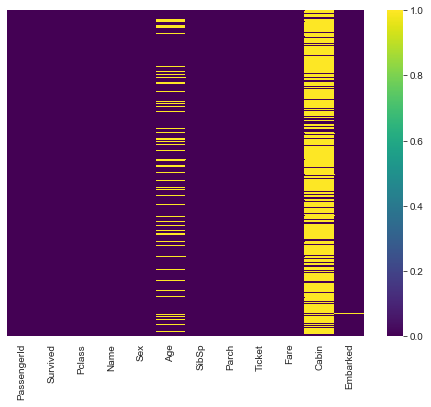

In [8]:
# check Nan / Null 
plt.figure(figsize=(8,6))
sns.heatmap(training_set.isna(), cmap='viridis', yticklabels=False)

### Checking Null & Impute `Age`

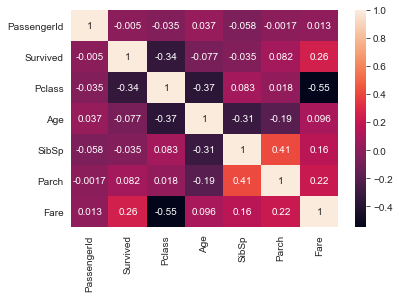

In [9]:
# AGE & Cabin got many Null Values
# Check it
sns.heatmap(training_set.corr(), annot=True)
# Age punya corelasi negatif dengan Pclass dan SIbSp

In [10]:
#check Pclass
training_set['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

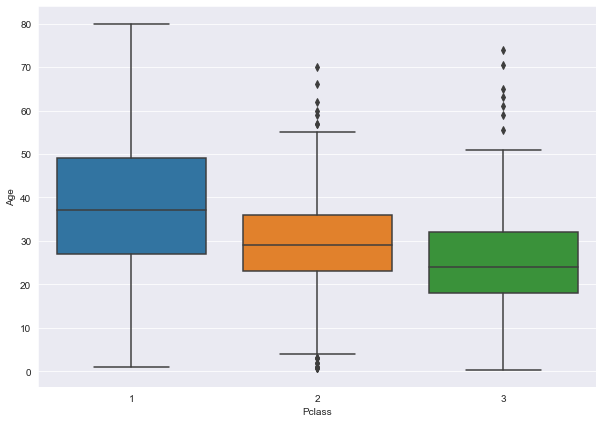

In [11]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
sns.boxplot(data=training_set, x='Pclass', y='Age')

In [12]:
#dari tabel diatas kita akan isi umur yg Null dgn rata2 umur per Pclass
training_set[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [13]:
# Buat fungsi imputansi Umur
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.2
        elif Pclass == 2:
            return 29.8
        else:
            return 25.1
    else :
        return Age

In [14]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(impute_age, axis=1)

In [15]:
#Check again
training_set.isnull().any() #--> sudah terisi

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Checking Null & Impute `Cabin`

In [16]:
#Check Cabin
training_set['Cabin'].isnull().sum()

687

In [17]:
round(training_set['Cabin'].isnull().sum() / len(training_set['Cabin']) *100,2)

77.1

In [18]:
training_set['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
D              3
              ..
A36            1
E17            1
C128           1
C106           1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [19]:
training_set['Cabin'].nunique()

147

In [20]:
# Too Many Unique value & To many Null / NaN
# Drop it anyway
training_set.drop(['Cabin'], axis=1, inplace=True)

In [21]:
training_set.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

### Checking Null & Impute `Embarked`

In [22]:
#Check Embarked
training_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
training_set['Embarked'].isnull().sum()

2

In [24]:
# Hanya 2 yg Null /NaN. coba kita lihat
training_set[training_set['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [25]:
# Drop Nan
training_set.dropna(inplace=True)

In [26]:
training_set.isna().any() #Clean from Null / Nan values

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

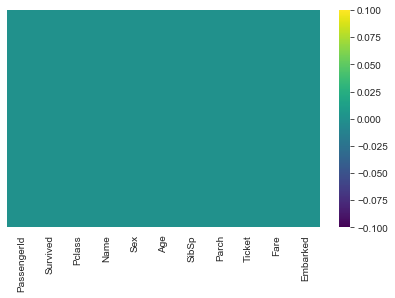

In [27]:
#Conclusion
plt.figure(figsize=(7,4))
sns.heatmap(training_set.isna(), cmap='viridis', yticklabels=False)

## Feature Engineering /  Feature Selection

In [28]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.1,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Get Dummies `Sex`

In [29]:
# Dummies Sex
sex = pd.get_dummies(training_set['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [30]:
# Dummies Sex
embarked = pd.get_dummies(training_set['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [31]:
# Concat all Dummies to training_set
training_set = pd.concat([training_set, sex, embarked], axis=1)
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.1,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,1,0,0


In [32]:
#Drop Unused Columns
cleaned_data = training_set.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [33]:
cleaned_data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.1,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


## EDA

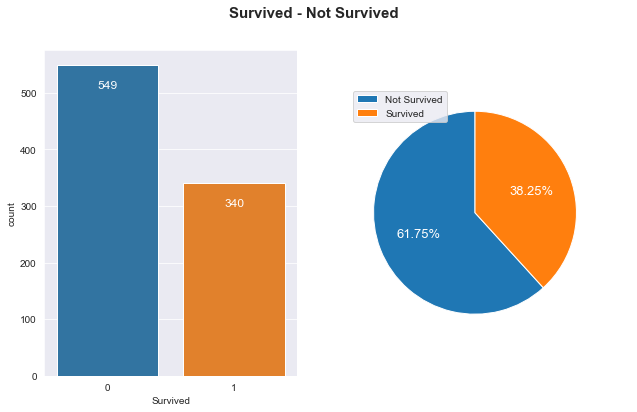

In [34]:
plt.figure(figsize=(10,6))
plt.suptitle('Survived - Not Survived', size= 15, fontweight="bold")

plt.subplot(1,2,1)
ax = sns.countplot(training_set['Survived'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, -20), fontsize=12, color='white', textcoords = 'offset points')
    
    
plt.subplot(1,2,2)
size = [len(training_set[training_set['Survived']==0]),len(training_set[training_set['Survived']==1])]
labels = ['Not Survived', 'Survived']

plt.pie(size, labels=labels, autopct='%2.2f%%', textprops={'size':13,'color':'white'}, startangle=90)
plt.legend()

plt.show()

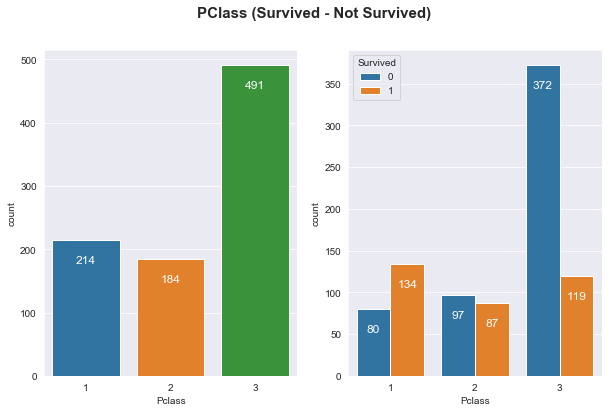

In [35]:
plt.figure(figsize=(10,6))
plt.suptitle('PClass (Survived - Not Survived)', size= 15, fontweight="bold")

plt.subplot(121)
ax2 = sns.countplot(x = 'Pclass', data = training_set)
for pc in ax2.patches:
    ax2.annotate(format(pc.get_height(), '.0f'), (pc.get_x() + pc.get_width() / 2., pc.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, -20), fontsize=12, color='white', textcoords = 'offset points')

ax3 = plt.subplot(122)
sns.countplot(x = 'Pclass', hue = 'Survived', data=training_set)
for pc in ax3.patches:
    ax3.annotate(format(pc.get_height(), '.0f'), (pc.get_x() + pc.get_width() / 2., pc.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, -20), fontsize=12, color='white', textcoords = 'offset points')

plt.show()

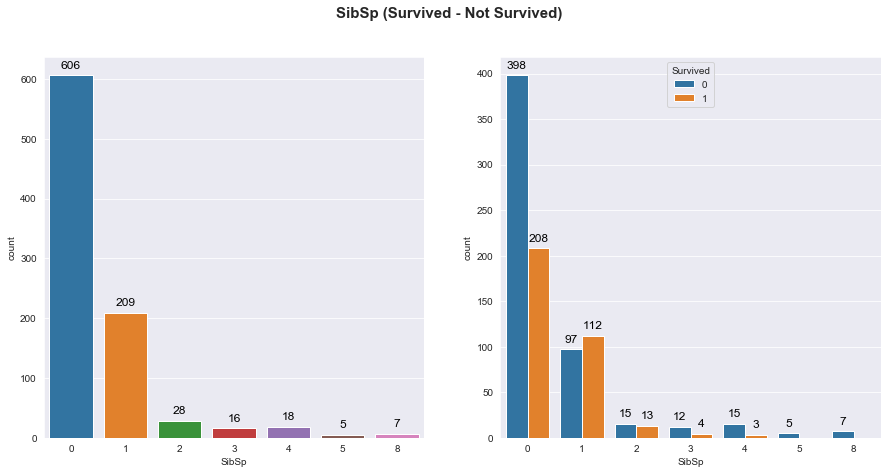

In [36]:
plt.figure(figsize=(15,7))
plt.suptitle('SibSp (Survived - Not Survived)', size= 15, fontweight="bold")

plt.subplot(121)
ax4 = sns.countplot(x = 'SibSp', data = training_set)
for sp in ax4.patches:
    ax4.annotate(format(sp.get_height(), '.0f'), (sp.get_x() + sp.get_width() / 2., sp.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')

ax5 = plt.subplot(122)
sns.countplot(x = 'SibSp', hue = 'Survived', data=training_set)
for sp in ax5.patches:
    ax5.annotate(format(sp.get_height(), '.0f'), (sp.get_x() + sp.get_width() / 2., sp.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')

plt.show()

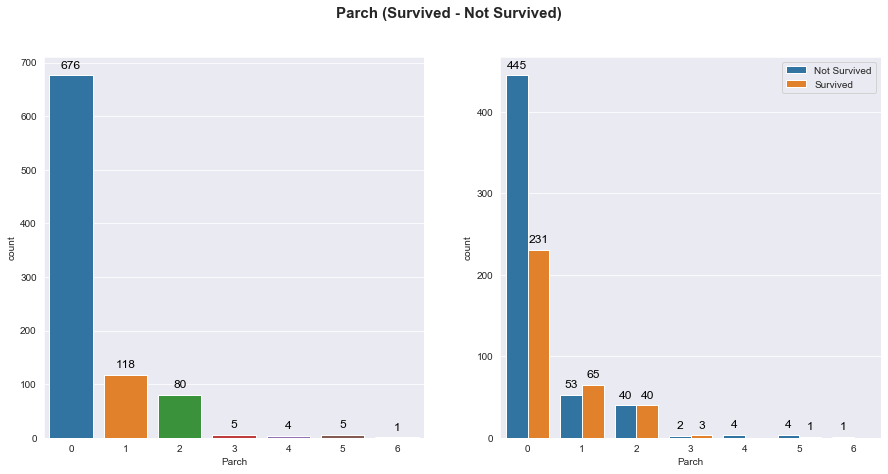

In [37]:
plt.figure(figsize=(15,7))
plt.suptitle('Parch (Survived - Not Survived)', size= 15, fontweight="bold")
           
plt.subplot(121)
ax6 = sns.countplot(x = 'Parch', data=training_set)
for pr in ax6.patches:
    ax6.annotate(format(pr.get_height(), '.0f'), (pr.get_x() + pr.get_width() / 2., pr.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')
           
plt.subplot(122)
ax7 = sns.countplot(x = 'Parch', hue = 'Survived', data=training_set)
for pr in ax7.patches:
    ax7.annotate(format(pr.get_height(), '.0f'), (pr.get_x() + pr.get_width() / 2., pr.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')
labels = ['Not Survived', 'Survived']
plt.legend(labels, loc='upper right')

plt.show()

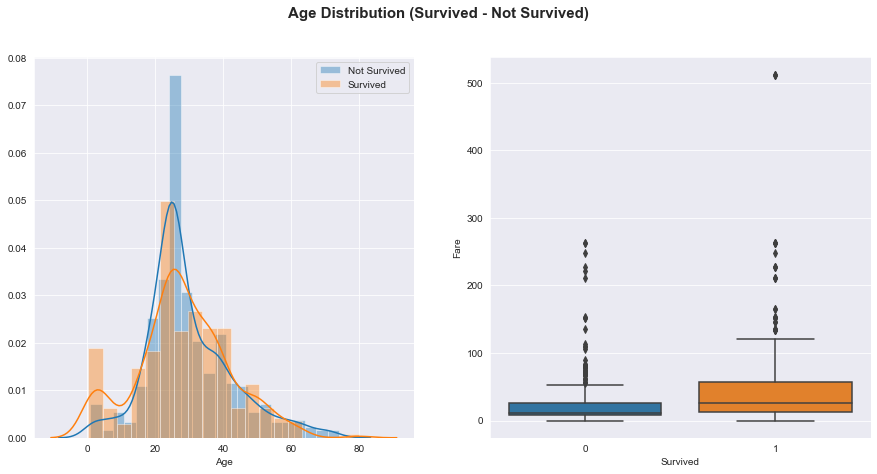

In [38]:
plt.figure(figsize=(15,7))
plt.suptitle('Age Distribution (Survived - Not Survived)', size= 15, fontweight="bold")

plt.subplot(121)
sns.distplot(training_set[training_set['Survived'] == 0]['Age'], label = 'Not Survived')
sns.distplot(training_set[training_set['Survived'] == 1]['Age'], label = 'Survived')
plt.legend()

plt.subplot(122)
sns.boxplot(data=training_set, x='Survived', y='Fare')

plt.show()

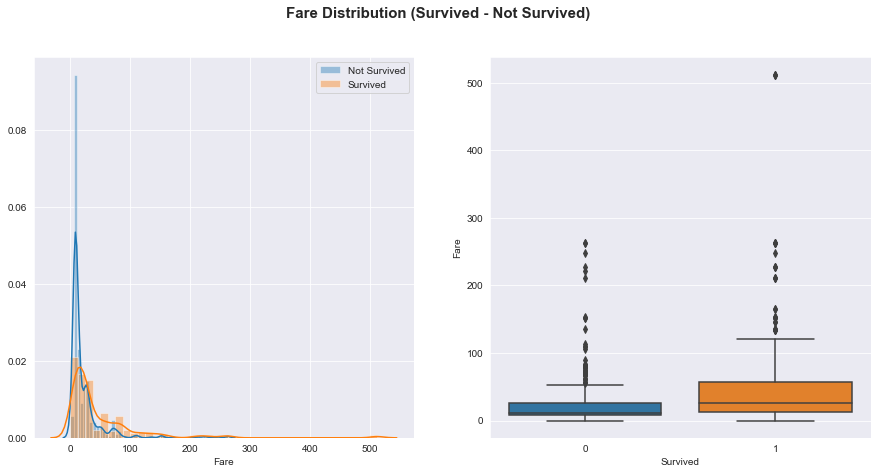

In [39]:
plt.figure(figsize=(15,7))
plt.suptitle('Fare Distribution (Survived - Not Survived)', size= 15, fontweight="bold")

plt.subplot(121)
sns.distplot(training_set[training_set['Survived'] == 0]['Fare'], label = 'Not Survived')
sns.distplot(training_set[training_set['Survived'] == 1]['Fare'], label = 'Survived')
plt.legend()

plt.subplot(122)
sns.boxplot(data=training_set, x='Survived', y='Fare')


plt.show()

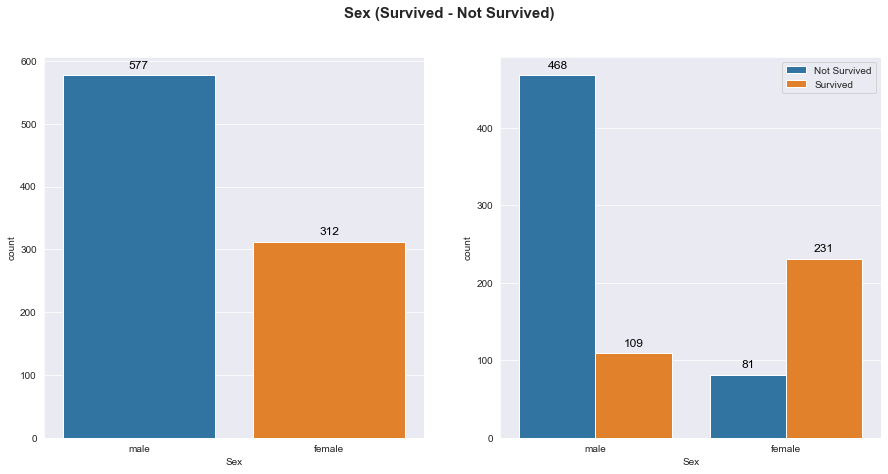

In [40]:
plt.figure(figsize=(15,7))
plt.suptitle('Sex (Survived - Not Survived)', size= 15, fontweight="bold")
           
plt.subplot(121)
ax8 = sns.countplot(x = 'Sex', data=training_set)
for sx in ax8.patches:
    ax8.annotate(format(sx.get_height(), '.0f'), (sx.get_x() + sx.get_width() / 2., sx.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')
           
plt.subplot(122)
ax9 = sns.countplot(x = 'Sex', hue = 'Survived', data=training_set)
for sx in ax9.patches:
    ax9.annotate(format(sx.get_height(), '.0f'), (sx.get_x() + sx.get_width() / 2., sx.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')
labels = ['Not Survived', 'Survived']
plt.legend(labels)

plt.show()

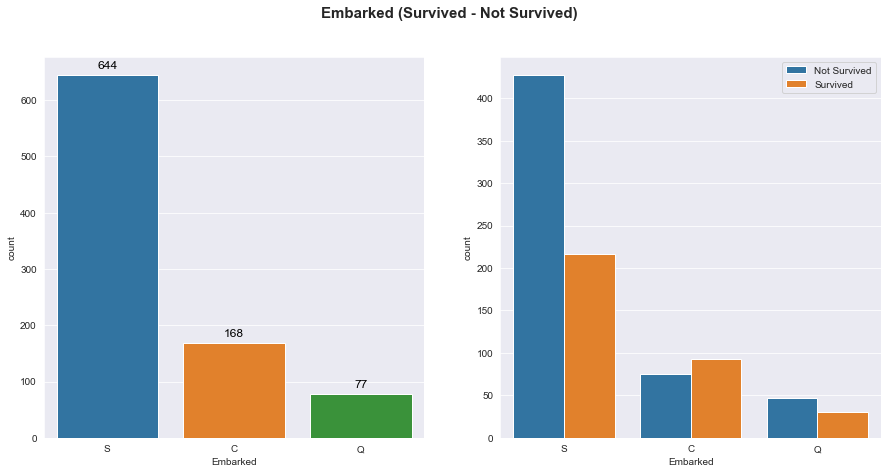

In [41]:
plt.figure(figsize=(15,7))
plt.suptitle('Embarked (Survived - Not Survived)', size= 15, fontweight="bold")
           
plt.subplot(121)
ax10 = sns.countplot(x = 'Embarked', data=training_set)
for em in ax10.patches:
    ax10.annotate(format(em.get_height(), '.0f'), (em.get_x() + em.get_width() / 2., em.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')
           
plt.subplot(122)
ax11 = sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set)
for em in ax11.patches:
    ax9.annotate(format(em.get_height(), '.0f'), (em.get_x() + em.get_width() / 2., em.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), fontsize=12, color='black', textcoords = 'offset points')
labels = ['Not Survived', 'Survived']
plt.legend(labels)

plt.show()

### Correlation Features - Label 

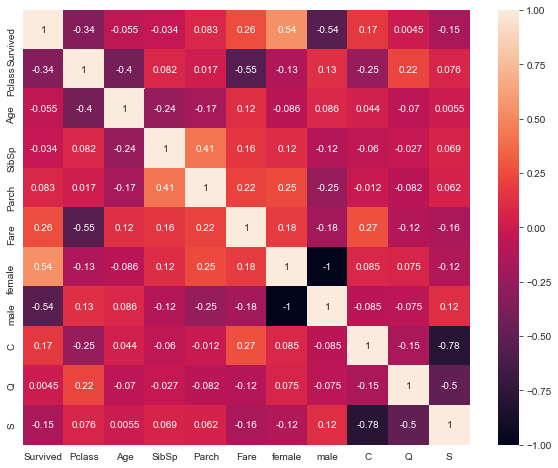

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_data.corr(), annot=True)
plt.show()

In [43]:
df_cor = cleaned_data.corr()[['Survived']].sort_values('Survived')
df_cor

,Survived
male,-0.541585
Pclass,-0.335549
S,-0.151777
Age,-0.055157
SibSp,-0.034040
Q,0.004536
Parch,0.083151
C,0.169966
Fare,0.255290
female,0.541585


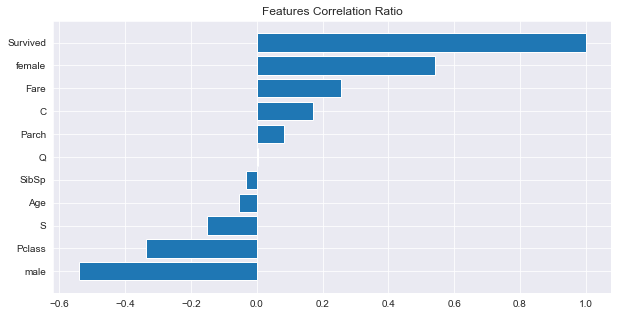

In [44]:
plt.figure(figsize=(10,5))
plt.title('Features Correlation Ratio')

plt.barh(width = df_cor['Survived'], y=df_cor.index)
plt.show()

## Train Test Split

In [45]:
cleaned_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [46]:
X = cleaned_data.drop('Survived', axis=1)
y = cleaned_data['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

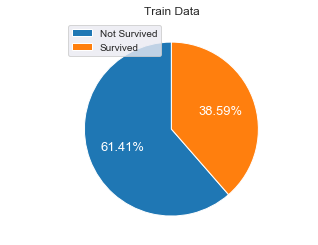

In [48]:
sizes = [len(y_train[y_train==0]), len(y_train[y_train==1])]
labels = ['Not Survived', 'Survived']


plt.title('Train Data')
plt.pie(sizes, labels=labels, autopct='%2.2f%%', textprops={'size':13,'color':'white'}, startangle=90)

plt.legend()
plt.show()

# Modeling
- Focus pada angka FP (actualnya tidak selamat, tapi di prediksi selamat) yang kecil 
- Karena fokus pada FP, maka Metricnya akan menggunakan `Precision(+)`, `Recall(-)`, `accuracy`, `roc auc`

## Logistic Regression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
pred_logreg = logreg.predict(X_test)
proba_logreg = logreg.predict_proba(X_test)

In [51]:
print(confusion_matrix(y_test, pred_logreg))

[[138  29]
 [ 27  73]]


In [52]:
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       167
           1       0.72      0.73      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [53]:
cr_logreg = classification_report(y_test,pred_logreg,output_dict=True)
cr_logreg = pd.DataFrame(cr_logreg).T
cr_logreg

,precision,recall,f1-score,support
0,0.836364,0.826347,0.831325,167.000000
1,0.715686,0.730000,0.722772,100.000000
accuracy,0.790262,0.790262,0.790262,0.790262
macro avg,0.776025,0.778174,0.777049,267.000000
weighted avg,0.791166,0.790262,0.790669,267.000000


In [54]:
cv_score_logreg = round(cross_val_score(logreg, X_test, y_test, cv = 10, scoring='precision').mean()*100,2)
cv_score_logreg

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

79.98

## Decision Tree Classifier

In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
pred_dt = dtree.predict(X_test)
proba_dt = dtree.predict_proba(X_test)

In [57]:
print(confusion_matrix(y_test, pred_dt))

[[132  35]
 [ 30  70]]


In [58]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       167
           1       0.67      0.70      0.68       100

    accuracy                           0.76       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.76      0.76      0.76       267



In [59]:
cr_dt = classification_report(y_test,pred_dt,output_dict=True)
cr_dt = pd.DataFrame(cr_dt).T
cr_dt

,precision,recall,f1-score,support
0,0.814815,0.790419,0.802432,167.000000
1,0.666667,0.700000,0.682927,100.000000
accuracy,0.756554,0.756554,0.756554,0.756554
macro avg,0.740741,0.745210,0.742679,267.000000
weighted avg,0.759329,0.756554,0.757673,267.000000


In [60]:
cv_score_dt = round(cross_val_score(dtree, X_test, y_test, cv = 10, scoring='precision').mean()*100,2)
cv_score_dt

65.02

## Random Forest Classifier

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
pred_rfc = rfc.predict(X_test)
proba_rfc = rfc.predict_proba(X_test)

In [63]:
print(confusion_matrix(y_test, pred_rfc))

[[142  25]
 [ 34  66]]


In [64]:
cr_rfc = classification_report(y_test,pred_rfc,output_dict=True)
cr_rfc = pd.DataFrame(cr_rfc).T
cr_rfc

,precision,recall,f1-score,support
0,0.806818,0.850299,0.827988,167.000000
1,0.725275,0.660000,0.691099,100.000000
accuracy,0.779026,0.779026,0.779026,0.779026
macro avg,0.766046,0.755150,0.759544,267.000000
weighted avg,0.776278,0.779026,0.776719,267.000000


In [65]:
cv_score_rfc = round(cross_val_score(rfc, X_test, y_test, cv = 10, scoring='precision').mean()*100,2)
cv_score_rfc

70.27

## Gradient Boosting Classifier

In [66]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
pred_gradient = gradient.predict(X_test)
proba_gradient = gradient.predict_proba(X_test)

In [68]:
print(confusion_matrix(y_test, pred_gradient))

[[147  20]
 [ 28  72]]


In [69]:
print(classification_report(y_test, pred_gradient))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       167
           1       0.78      0.72      0.75       100

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



In [70]:
cr_grad = classification_report(y_test,pred_gradient,output_dict=True)
cr_grad = pd.DataFrame(cr_grad).T
cr_grad

,precision,recall,f1-score,support
0,0.840000,0.880240,0.859649,167.000000
1,0.782609,0.720000,0.750000,100.000000
accuracy,0.820225,0.820225,0.820225,0.820225
macro avg,0.811304,0.800120,0.804825,267.000000
weighted avg,0.818505,0.820225,0.818582,267.000000


In [71]:
cv_score_grad = round(cross_val_score(gradient, X_test, y_test, cv = 10, scoring='precision').mean()*100,2)
cv_score_grad

76.25

## ROC AUC

In [72]:
prob_logreg = proba_logreg[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

prob_dt = proba_dt[:,1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

prob_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

prob_gradient = proba_gradient[:,1]
fpr_gradient, tpr_gradient, threshold_gradient = roc_curve(y_test, prob_gradient)
roc_auc_gradient = auc(fpr_gradient, tpr_gradient)

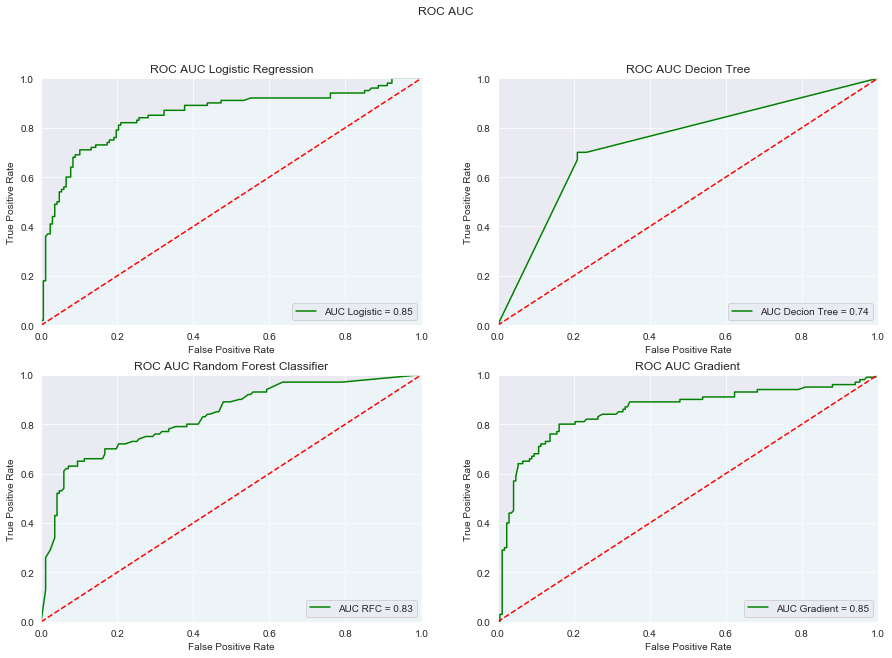

In [73]:
plt.figure(figsize=(15,10))
plt.suptitle('ROC AUC')

plt.subplot(221)
plt.title('ROC AUC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'green', label='AUC Logistic = {}'.format(round(roc_auc_logreg,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg,tpr_logreg, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(222)
plt.title('ROC AUC Decion Tree')
plt.plot(fpr_dt, tpr_dt, 'green', label='AUC Decion Tree = {}'.format(round(roc_auc_dt,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dt,tpr_dt, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(223)
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc, tpr_rfc, 'green', label='AUC RFC = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.subplot(224)
plt.title('ROC AUC Gradient')
plt.plot(fpr_gradient, tpr_gradient, 'green', label='AUC Gradient = {}'.format(round(roc_auc_gradient,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gradient,tpr_gradient, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

plt.show()

## Metric Evaluation Summary

In [74]:
prec_logreg = round(cr_logreg.iloc[1,0]*100,2)
rec_logreg = round(cr_logreg.iloc[0,1]*100,2)
acc_logerg = round(cr_logreg.iloc[2,0]*100,2)
auc_logreg = round(auc(fpr_logreg, tpr_logreg)*100,2)


prec_dt = round(cr_dt.iloc[1,0]*100,2)
rec_dt = round(cr_dt.iloc[0,1]*100,2)
acc_dt = round(cr_dt.iloc[2,0]*100,2)
auc_dt = round(auc(fpr_dt, tpr_dt)*100,2)


prec_rfc = round(cr_rfc.iloc[1,0]*100,2)
rec_rfc = round(cr_rfc.iloc[0,1]*100,2)
acc_rfc = round(cr_rfc.iloc[2,0]*100,2)
auc_rfc = round(auc(fpr_rfc, tpr_rfc)*100,2)


prec_grad = round(cr_grad.iloc[1,0]*100,2)
rec_grad = round(cr_grad.iloc[0,1]*100,2)
acc_grad = round(cr_grad.iloc[2,0]*100,2)
auc_grad = round(auc(fpr_gradient, tpr_gradient)*100,2)


all_prec = [prec_logreg, prec_dt, prec_rfc, prec_grad]
all_rec = [rec_logreg,rec_dt,rec_rfc,rec_grad]
all_acc = [acc_logerg, acc_dt, acc_rfc, acc_grad]
all_auc = [auc_logreg, auc_dt, auc_rfc, auc_grad]

all_cv_score = [cv_score_logreg, cv_score_dt, cv_score_rfc, cv_score_grad]

In [75]:
df_mtrc = pd.DataFrame([all_prec,all_rec,all_acc, all_auc, all_cv_score], 
                       columns=['logreg', 'dtree', 'rfc', 'gradboost'],
                       index=['precision(+)', 'recall(-)', 'accuracy', 'auc', 'cv_score'])
df_mtrc = df_mtrc.T
df_mtrc

,precision(+),recall(-),accuracy,auc,cv_score
logreg,71.57,82.63,79.03,85.21,79.98
dtree,66.67,79.04,75.66,73.85,65.02
rfc,72.53,85.03,77.90,83.12,70.27
gradboost,78.26,88.02,82.02,85.33,76.25


In [76]:
#Sort by Metric Score
df_mtrc.sort_values(['precision(+)', 'recall(-)', 'accuracy', 'auc', 'cv_score'], ascending=False)

,precision(+),recall(-),accuracy,auc,cv_score
gradboost,78.26,88.02,82.02,85.33,76.25
rfc,72.53,85.03,77.90,83.12,70.27
logreg,71.57,82.63,79.03,85.21,79.98
dtree,66.67,79.04,75.66,73.85,65.02


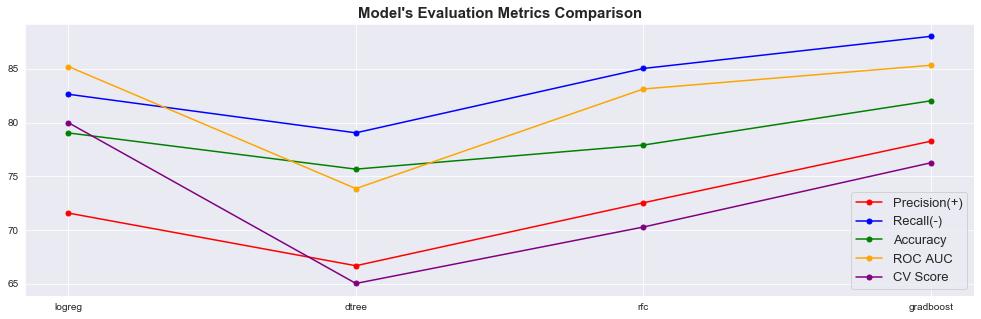

In [77]:
plt.figure(figsize=(17,5))
plt.title("Model's Evaluation Metrics Comparison", size=15, fontweight='bold')

plt.plot(df_mtrc.index, df_mtrc['precision(+)'], label = 'Precision(+)', color='red', marker='o', markersize=5)
plt.plot(df_mtrc.index, df_mtrc['recall(-)'], label = 'Recall(-)', color='blue', marker='o', markersize=5)
plt.plot(df_mtrc.index, df_mtrc['accuracy'], label = 'Accuracy', color='green', marker='o', markersize=5)
plt.plot(df_mtrc.index, df_mtrc['auc'], label = 'ROC AUC', color='orange', marker='o', markersize=5)
plt.plot(df_mtrc.index, df_mtrc['cv_score'], label = 'CV Score', color='purple', marker='o', markersize=5)
plt.legend(loc='lower right', prop={'size': 13})
plt.show()

### Best Model `Gradient Boosting Classifier`

In [78]:
gradient.feature_importances_

array([0.12113801, 0.1243519 , 0.08724549, 0.01059427, 0.19201923,
       0.11394137, 0.31983097, 0.00741659, 0.00145919, 0.02200298])

In [79]:
feature_importance = pd.DataFrame({'features': X_train.columns, 'importances': gradient.feature_importances_})
feature_importance.sort_values('importances', ascending=False)

,features,importances
6,male,0.319831
4,Fare,0.192019
1,Age,0.124352
0,Pclass,0.121138
5,female,0.113941
2,SibSp,0.087245
9,S,0.022003
3,Parch,0.010594
7,C,0.007417
8,Q,0.001459


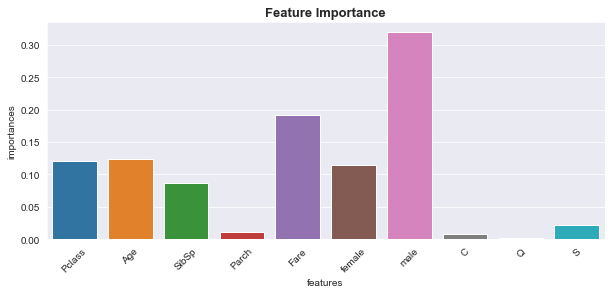

In [80]:
plt.figure(figsize=(10,4))
plt.title('Feature Importance', size=13, fontweight='bold')
sns.barplot(x='features', y='importances', data=feature_importance)
plt.xticks(rotation=45)
plt.show()